In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

file = pd.read_csv("../data/data.csv")

file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
file.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
file.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = file.drop(columns=['Unnamed: 32'])

In [7]:
df2 = df.drop(columns=['id'])

In [8]:
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df_le = df2.loc[:, ["diagnosis"]]
df_le["diagnosis"] = [1 if x == "M" else 0 for x in df_le.diagnosis]
df_le.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [10]:
num_cols = []

for col in df2.columns:
    if (df2[col].dtype == "float64"):
        print(col)
        num_cols.append(col)
        
df_num = df2.loc[:, num_cols]
df_num.head()

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_scale=df_num

In [12]:
# scale training set
df_scale2 = pd.concat([df_scale, df_le], axis=1)
df_scale2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [13]:
corrs = abs(df_scale2.corr())["diagnosis"].sort_values(ascending=False)
corrs

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [14]:
corrs.index

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se'],
      dtype='object')

In [15]:
# LOW correlations <.50
cols_to_drop = ['texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se']

cols_keep = [x for x in df_scale2 if x not in cols_to_drop]
df_scale3 = df_scale2.loc[:, cols_keep]
df_scale3.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1


In [16]:
X = df_scale3.loc[:, ['concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se']].values
y = df_scale3["diagnosis"].values

In [17]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7486818980667839
0.2513181019332162


In [18]:
# Initialize the model
model1 = LogisticRegression()

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       267
           1       0.95      0.92      0.94       159

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426

[[259   8]
 [ 12 147]]

Testing SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.94      0.92      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[87  3]
 [ 4 49]]


C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


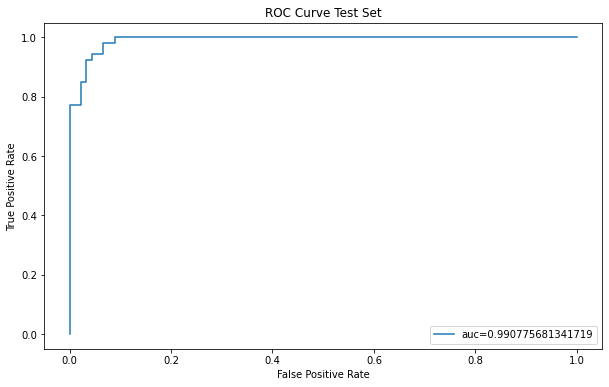

In [19]:
y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [20]:
# Initialize the model
model2 = KNeighborsClassifier(n_neighbors=5)

# FIT THE MODEL
model2.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model2.predict(X_train)
test_preds = model2.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       267
           1       0.96      0.89      0.93       159

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

[[261   6]
 [ 17 142]]

Testing SET
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.92      0.85      0.88        53

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143

[[86  4]
 [ 8 45]]


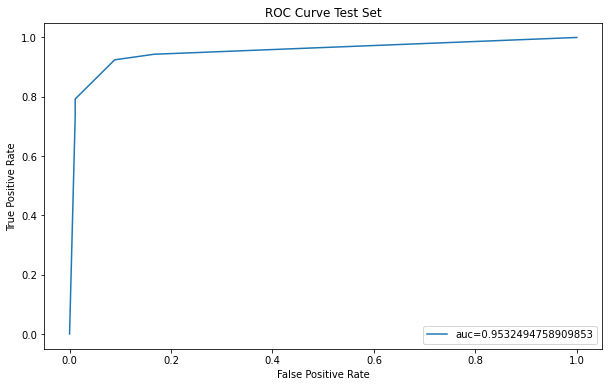

In [21]:
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [22]:
# Initialize the model
model3 = SVC(probability=True)

# FIT THE MODEL
model3.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model3.predict(X_train)
test_preds = model3.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       267
           1       0.98      0.80      0.88       159

    accuracy                           0.92       426
   macro avg       0.93      0.89      0.91       426
weighted avg       0.92      0.92      0.92       426

[[264   3]
 [ 32 127]]

Testing SET
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        90
           1       0.96      0.83      0.89        53

    accuracy                           0.92       143
   macro avg       0.93      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143

[[88  2]
 [ 9 44]]


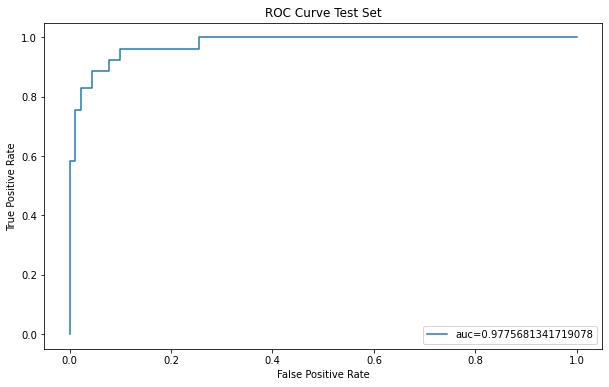

In [23]:
y_pred_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [24]:
# Initialize the model
model4 = RandomForestClassifier()

# FIT THE MODEL
model4.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model4.predict(X_train)
test_preds = model4.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

[[267   0]
 [  0 159]]

Testing SET
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        90
           1       0.89      0.96      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

[[84  6]
 [ 2 51]]


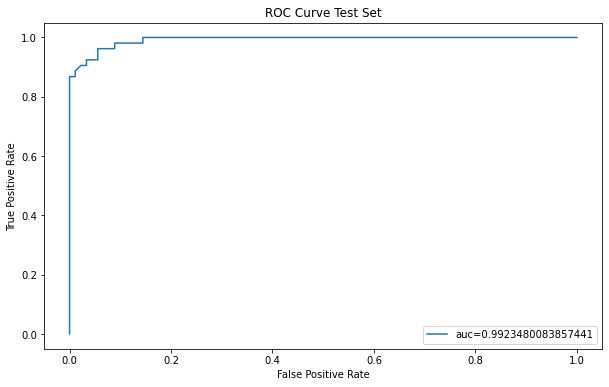

In [25]:
y_pred_proba = model4.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [26]:
model1 = LogisticRegression(random_state=23)

LR Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       357
           1       0.95      0.92      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569


Confusion Matrix - In Sample
[[347  10]
 [ 16 196]]




C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


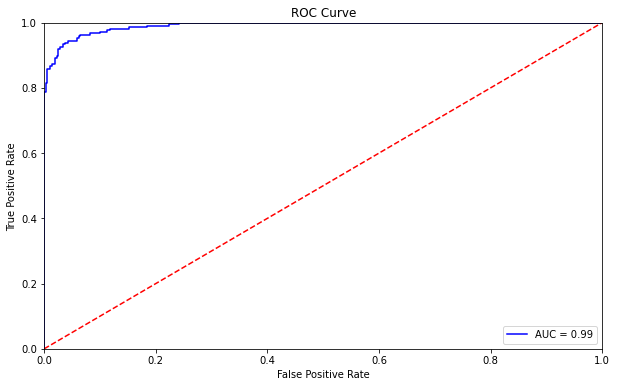

In [35]:
model1.fit(X, y)

#get predictions
in_sample_preds = model1.predict(X)

# get evaluation report
print("LR Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))
print()
print()

# get probabilities for the ROC curve
preds = model1.predict_proba(X)[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [36]:
import pickle

In [37]:
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))